## Демонстрация работы формулы softmax с разной температурой (`τ`).
**Шпаргалка демонстрирует работу формулы softmax с разной температурой (`τ`).**

Возьмем простой набор "оценок" (логитов) для трех классов и посмотрим, как меняются вероятности при изменении температуры.

Температура = 0.1: Вероятности = [1. 0. 0.]
Температура = 0.5: Вероятности = [0.978 0.018 0.004]
Температура = 1.0: Вероятности = [0.836 0.113 0.051]
Температура = 2.0: Вероятности = [0.619 0.228 0.153]
Температура = 5.0: Вероятности = [0.446 0.299 0.255]
Температура = 10.0: Вероятности = [0.388 0.318 0.294]


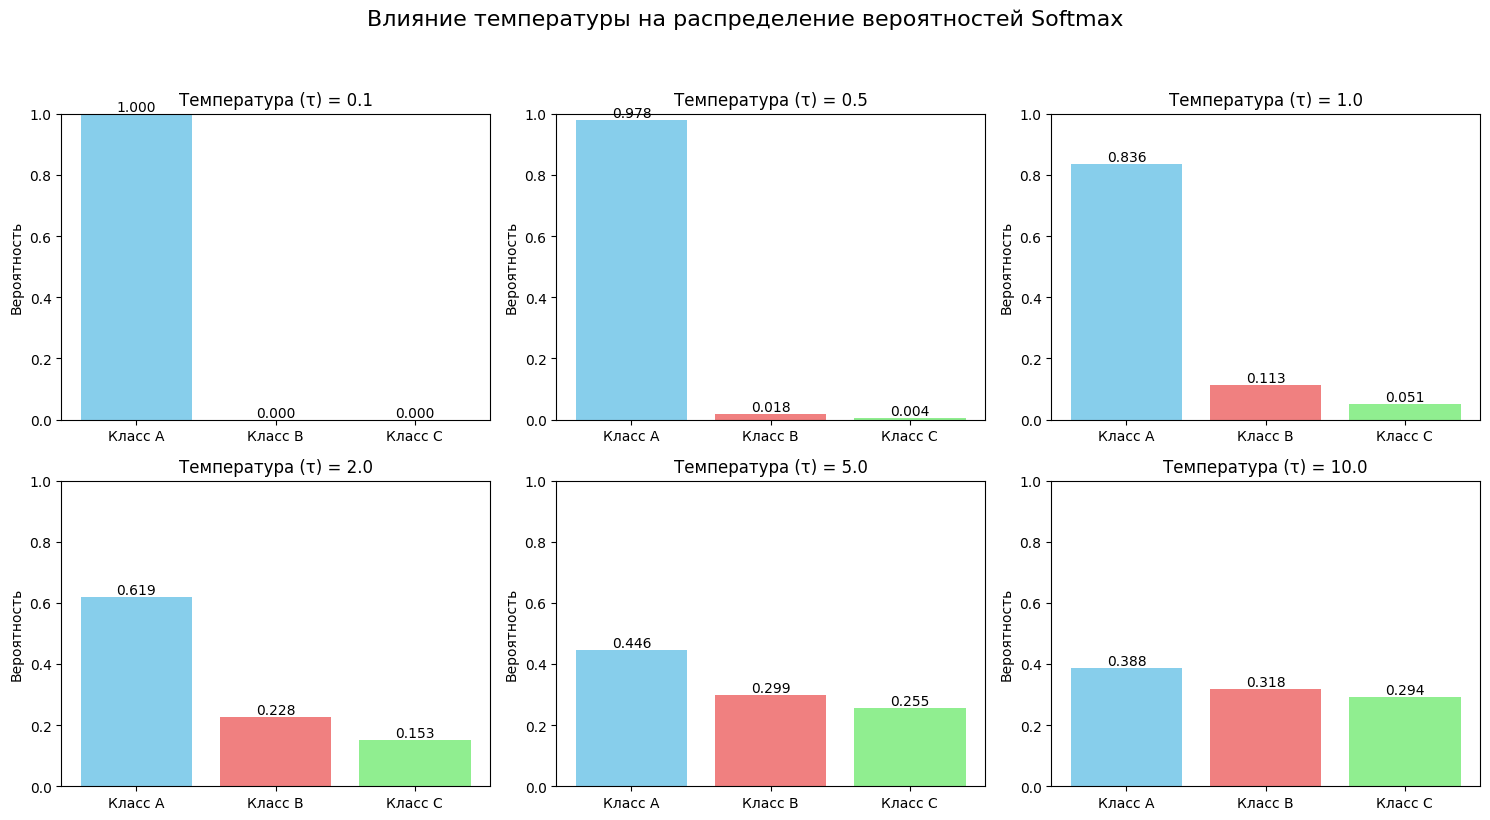

In [11]:
# -*- coding: utf-8 -*-
# Импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt

# Определяем функцию softmax с температурой
def softmax_with_temp(logits, temperature=1.0):
    """
    Вычисляет вероятности softmax для заданных логитов и температуры.

    Args:
        logits (np.array): Массив исходных оценок (логитов).
        temperature (float): Параметр температуры (должен быть > 0).

    Returns:
        np.array: Массив вероятностей softmax.
    """
    if temperature <= 0:
        raise ValueError("Температура должна быть положительным числом.")

    # Для численной стабильности вычитаем максимальный логит перед экспонентой
    # Это не меняет результат, но предотвращает переполнение при больших значениях логитов
    # Сначала делим на температуру, потом вычитаем максимум *измененных* логитов
    scaled_logits = logits / temperature
    max_logit = np.max(scaled_logits)
    exp_logits = np.exp(scaled_logits - max_logit)
    sum_exp_logits = np.sum(exp_logits)

    probabilities = exp_logits / sum_exp_logits
    return probabilities

# --- Шаг 1: Исходные данные ---
# Допустим, у нас есть 3 класса (или слова) с оценками (логитами)
# Класс A имеет самую высокую оценку, класс C - самую низкую.
logits = np.array([3.0, 1.0, 0.2])
labels = ['Класс A', 'Класс B', 'Класс C']

# --- Шаг 2: Задаем разные значения температуры ---
temperatures = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

# --- Шаг 3: Вычисляем вероятности для каждой температуры ---
results = {}
for temp in temperatures:
    probabilities = softmax_with_temp(logits, temperature=temp)
    results[temp] = probabilities
    print(f"Температура = {temp:.1f}: Вероятности = {np.round(probabilities, 3)}")

# --- Шаг 4: Визуализация результатов ---

# Определяем количество строк и столбцов для сетки графиков
n_temps = len(temperatures)
n_cols = 3
n_rows = int(np.ceil(n_temps / n_cols))

# Создаем фигуру и сетку осей для графиков
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
# Преобразуем axes в плоский массив для удобной итерации
axes = axes.flatten()

# Строим барные диаграммы для каждой температуры
for i, temp in enumerate(temperatures):
    probs = results[temp]
    ax = axes[i]
    bars = ax.bar(labels, probs, color=['skyblue', 'lightcoral', 'lightgreen'])

    ax.set_title(f'Температура (τ) = {temp}')
    ax.set_ylabel('Вероятность')
    ax.set_ylim(0, 1) # Устанавливаем одинаковый предел по Y для сравнения

    # Добавляем значения над столбцами
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom', ha='center') # va: vertical alignment

# Удаляем лишние оси, если количество температур не кратно n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Влияние температуры на распределение вероятностей Softmax', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Немного опускаем, чтобы заголовок не налезал
plt.show()

Пример наглядно показывает, как параметр температуры `τ` позволяет контролировать "уверенность" или "случайность" выбора в функции softmax.

**Объяснение кода и результатов:**

1.  **`softmax_with_temp(logits, temperature=1.0)`:** Реализует формулу softmax с температурой. Используется трюк с вычитанием максимума для численной стабильности.
2.  **`logits = np.array([3.0, 1.0, 0.2])`:** Исходные оценки. Класс A (3.0) является явным фаворитом.
3.  **`temperatures = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]`:** Список температур, которые мы хотим протестировать.
4.  **Вычисление вероятностей:** Код проходит по каждой температуре, вызывает функцию `softmax_with_temp` и сохраняет результат. Выводятся также численные значения вероятностей.
5.  **Визуализация:**
    *   Создается сетка графиков с помощью `matplotlib`.
    *   Для каждой температуры строится отдельная столбчатая диаграмма (`bar chart`), показывающая распределение вероятностей между тремя классами.
    *   Все графики имеют одинаковую шкалу по оси Y (от 0 до 1) для наглядного сравнения формы распределения.

**Наблюдения по графикам:**

*   **Низкая температура (τ = 0.1, 0.5):** Распределение очень "резкое". Практически вся вероятность (близкая к 1) концентрируется на классе с самой высокой исходной оценкой (Класс A). Модель становится очень "уверенной" в своем лучшем выборе. При τ=0.1 результат близок к операции `argmax`.
*   **Стандартная температура (τ = 1.0):** Это стандартный softmax. Вероятности отражают исходные оценки: Класс A имеет наибольшую вероятность, но Классы B и C также имеют заметные, хотя и меньшие, вероятности.
*   **Высокая температура (τ = 2.0, 5.0, 10.0):** Распределение становится все более "мягким" и "сглаженным". Различия между вероятностями классов уменьшаются. При очень высокой температуре (τ = 10.0) вероятности всех классов приближаются к равномерному распределению (1/3 ≈ 0.333 для трех классов), почти игнорируя исходные различия в оценках. Модель становится менее "уверенной" и более склонной выбирать разные варианты.


 - `argmax` (сокращение от "arguments of the maximum", аргументы максимума) — это математическая операция, которая находит **аргумент** (то есть входное значение или индекс), при котором функция или набор значений достигает своего **максимума**.

Проще говоря:

*   **`max`** находит **само максимальное значение**.
*   **`argmax`** находит **позицию (индекс) или входное значение**, где это максимальное значение находится.

**Примеры:**

1.  **Набор чисел:**
    *   Пусть у нас есть массив чисел: `A = [10, 50, 20, 40]`
    *   `max(A)` вернет `50` (само максимальное значение).
    *   `argmax(A)` вернет `1` (индекс элемента `50`, если считать с 0: 10 - индекс 0, **50 - индекс 1**, 20 - индекс 2, 40 - индекс 3).

2.  **Функция:**
    *   Пусть есть функция `f(x) = -(x - 2)^2 + 10`. Эта парабола имеет вершину в точке x=2, где значение функции равно 10.
    *   Максимальное значение функции `max(f(x))` равно `10`.
    *   `argmax(f(x))` равен `2` (значение `x`, при котором функция `f(x)` максимальна).

**В контексте классификации с помощью нейронных сетей и функции softmax:**

1.  Модель на выходе обычно выдает "логиты" (оценки) для каждого класса.
2.  Функция `softmax` преобразует эти логиты в вероятности (числа от 0 до 1, сумма которых равна 1).
3.  Чтобы принять окончательное решение о том, к какому классу относится входной объект, мы обычно выбираем класс с **наибольшей вероятностью**.
4.  Операция **`argmax`**, примененная к массиву вероятностей softmax, вернет **индекс класса**, у которого самая высокая вероятность.

**Пример с Softmax:**

*   Логиты: `[3.0, 1.0, 0.2]`
*   Вероятности после softmax (при T=1): `[0.839, 0.114, 0.047]` (примерно)
*   Применяем `argmax` к вероятностям `[0.839, 0.114, 0.047]`.
*   Результат `argmax`: `0` (потому что максимальное значение `0.839` находится на позиции с индексом `0`). Это означает, что модель выбирает первый класс.

При очень низкой температуре (τ → 0) функция softmax приближается к `argmax` по исходным логитам, так как почти вся вероятность концентрируется на элементе с максимальным логитом.


##  семействo функций и операций, связанных с поиском максимальных/минимальных значений
1.  **`Max` (Максимум):** Находит и возвращает **самое большое значение** из набора чисел или значений функции.
    *   **Пример:** `max([10, 50, 20, 40])` вернет `50`.
    *   **Использование:** Просто найти пиковое значение.

2.  **`Min` (Минимум):** Находит и возвращает **самое маленькое значение** из набора чисел или значений функции.
    *   **Пример:** `min([10, 50, 20, 40])` вернет `10`.
    *   **Использование:** Найти наименьшее значение, часто используется в функциях потерь (мы хотим минимизировать ошибку).

3.  **`Argmax` (Аргумент максимума):** Находит и возвращает **индекс (позицию) или входное значение (аргумент)**, при котором достигается максимальное значение. Не само значение, а его "адрес".
    *   **Пример:** `argmax([10, 50, 20, 40])` вернет `1` (индекс элемента 50, если считать с 0).
    *   **Использование:** Узнать, *какой* элемент является максимальным. В классификации — узнать индекс класса с наибольшей вероятностью/оценкой.

4.  **`Argmin` (Аргумент минимума):** Находит и возвращает **индекс (позицию) или входное значение (аргумент)**, при котором достигается минимальное значение.
    *   **Пример:** `argmin([10, 50, 20, 40])` вернет `0` (индекс элемента 10).
    *   **Использование:** Узнать, *какой* элемент является минимальным. Например, найти параметр, минимизирующий функцию потерь.

5.  **`Softmax`:** Преобразует вектор действительных чисел (логитов) в вектор вероятностей. Каждое выходное значение находится в диапазоне (0, 1), и их сумма равна 1. Большие входные значения получают большие вероятности. Это "мягкая", дифференцируемая версия `argmax`.
    *   **Пример:** `softmax([3.0, 1.0, 0.2])` вернет примерно `[0.839, 0.114, 0.047]`.
    *   **Использование:** Получение вероятностного распределения по классам в задачах классификации, используется в механизмах внимания, при генерации текста для выбора следующего слова. Ключевое свойство — дифференцируемость, что позволяет использовать ее в градиентных методах обучения.

6.  **`LogSoftmax`:** Применяет логарифм к результату `softmax`. То есть `log(softmax(x))`.
    *   **Пример:** `log_softmax([3.0, 1.0, 0.2])` вернет примерно `[-0.175, -2.175, -3.05]`.
    *   **Использование:** Часто используется в связке с функциями потерь, такими как NLLLoss (Negative Log Likelihood Loss). Вычисление `log_softmax` напрямую часто более численно стабильно, чем вычисление `softmax`, а затем взятие логарифма, особенно когда вероятности близки к 0. `log(softmax(x))` = `x - log(sum(exp(x)))` — это позволяет избежать вычисления `exp(x)`, которое может привести к очень большим или очень маленьким числам.

7.  **`Hardmax`:** Неформальный термин для операции, которая строго преобразует вектор в "one-hot" вектор, где элемент, соответствующий максимальному значению исходного вектора, становится 1, а все остальные — 0. По сути, это представление результата `argmax` в виде вектора.
    *   **Пример:** "Hardmax" от `[3.0, 1.0, 0.2]` будет `[1, 0, 0]`.
    *   **Использование:** Теоретическое сравнение с `softmax`. `softmax` — это гладкая аппроксимация "hardmax". "Hardmax" не дифференцируема в точках, где есть несколько одинаковых максимумов, и ее градиент равен нулю почти везде, что делает ее непригодной для обучения с помощью градиентного спуска.

- `max`/`min` и `argmax`/`argmin` дают точные, но "жесткие" ответы, в то время как
- `softmax` предоставляет "мягкую", вероятностную и дифференцируемую альтернативу `argmax`.